## Vivian Sant'Anna

#Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

# Exibindo as primeiras linhas do DataFrame para verificação
print(previsao_de_renda.head())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

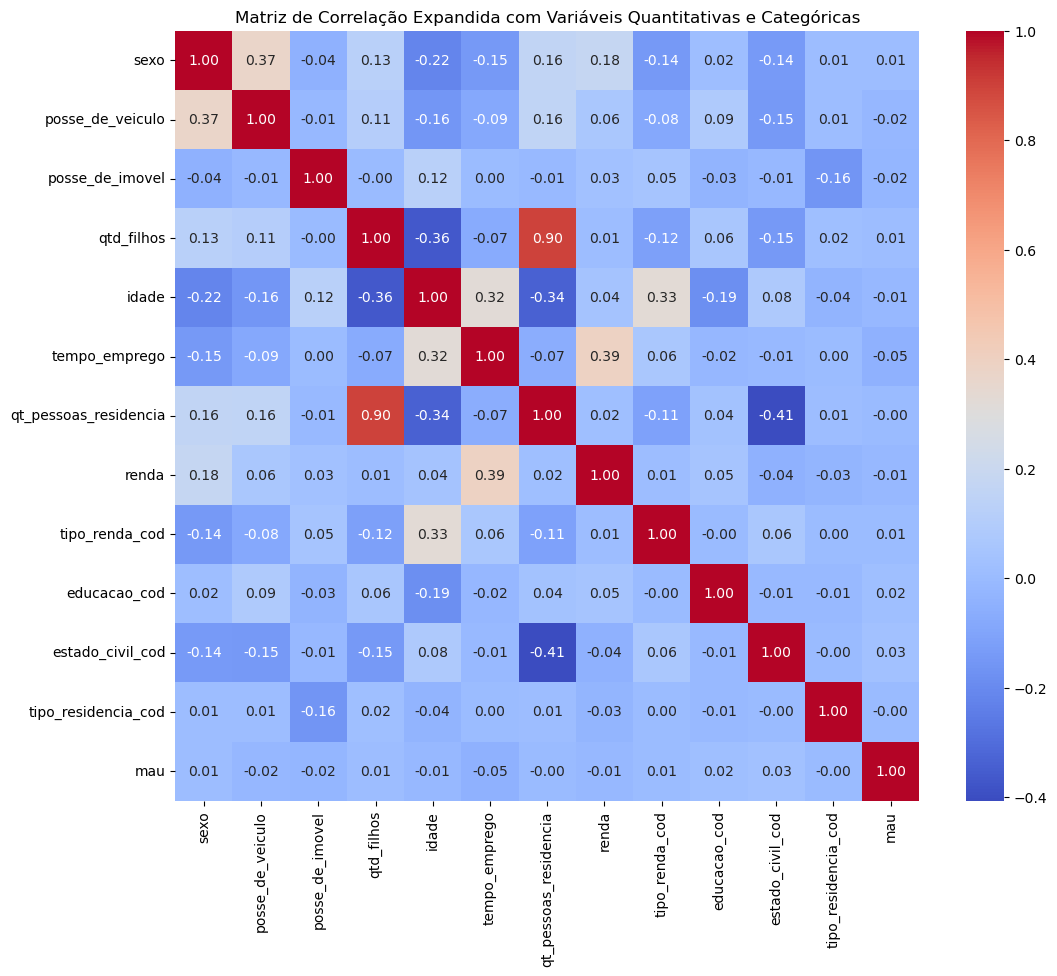

In [3]:
from sklearn.preprocessing import LabelEncoder

# Convertendo variáveis categóricas binárias em numéricas
previsao_de_renda['sexo'] = previsao_de_renda['sexo'].map({'F': 0, 'M': 1})  # Feminino: 0, Masculino: 1
previsao_de_renda['posse_de_veiculo'] = previsao_de_renda['posse_de_veiculo'].astype(int)  # False: 0, True: 1
previsao_de_renda['posse_de_imovel'] = previsao_de_renda['posse_de_imovel'].astype(int)  # False: 0, True: 1
previsao_de_renda['mau'] = previsao_de_renda['mau'].astype(int)  # False: 0, True: 1

# Codificando variáveis categóricas nominais e ordinais
label_encoder = LabelEncoder()
variaveis_para_codificar = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

for var in variaveis_para_codificar:
    previsao_de_renda[var + '_cod'] = label_encoder.fit_transform(previsao_de_renda[var])

# Selecionando variáveis para análise, incluindo as codificadas
variaveis_analise = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
                     'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'tipo_renda_cod',
                     'educacao_cod', 'estado_civil_cod', 'tipo_residencia_cod', 'mau']

# Calculando a matriz de correlação com as novas variáveis incluídas
correlacao_expandida = previsao_de_renda[variaveis_analise].corr()

# Gerando o mapa de calor da matriz de correlação expandida
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao_expandida, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação Expandida com Variáveis Quantitativas e Categóricas')
plt.show()

**Insights**

**Correlação entre Posse de Veículo e Sexo:** Há uma correlação moderada entre a posse de veículo e o sexo (0,37), sugerindo que, neste conjunto de dados, os homens podem ter uma probabilidade ligeiramente maior de possuir um veículo em comparação com as mulheres.

**Correlação entre Idade e Tempo de Emprego:** Existe uma correlação positiva significativa entre a idade e o tempo de emprego (0,62), o que é intuitivo, já que indivíduos mais velhos tendem a ter tido mais oportunidades de acumular experiência de trabalho ao longo do tempo.

**Correlação Negativa entre Idade e Qtd de Filhos:** Observa-se uma correlação negativa leve entre a idade e a quantidade de filhos (-0,35), o que pode indicar que, neste conjunto de dados, famílias mais jovens tendem a ter mais filhos.

**Relação entre Educação e Renda:** A variável educacao_cod tem uma correlação com renda (-0,20), o que pode sugerir que diferentes níveis de educação possam estar associados a diferentes faixas de renda, embora a correlação não seja muito forte. Vale notar que a codificação usada pode não refletir completamente a ordem ou o valor intrínseco dos níveis de educação em relação à renda.

**Correlação Negativa entre Tipo de Renda e Renda:** A variável tipo_renda_cod mostra uma correlação negativa com renda (-0,23), o que pode indicar que diferentes tipos de renda (como assalariado, empresário, etc.) possuem diferentes potenciais de renda. Similar à educação, a natureza da codificação pode não capturar completamente a relação entre o tipo de renda e o valor da renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

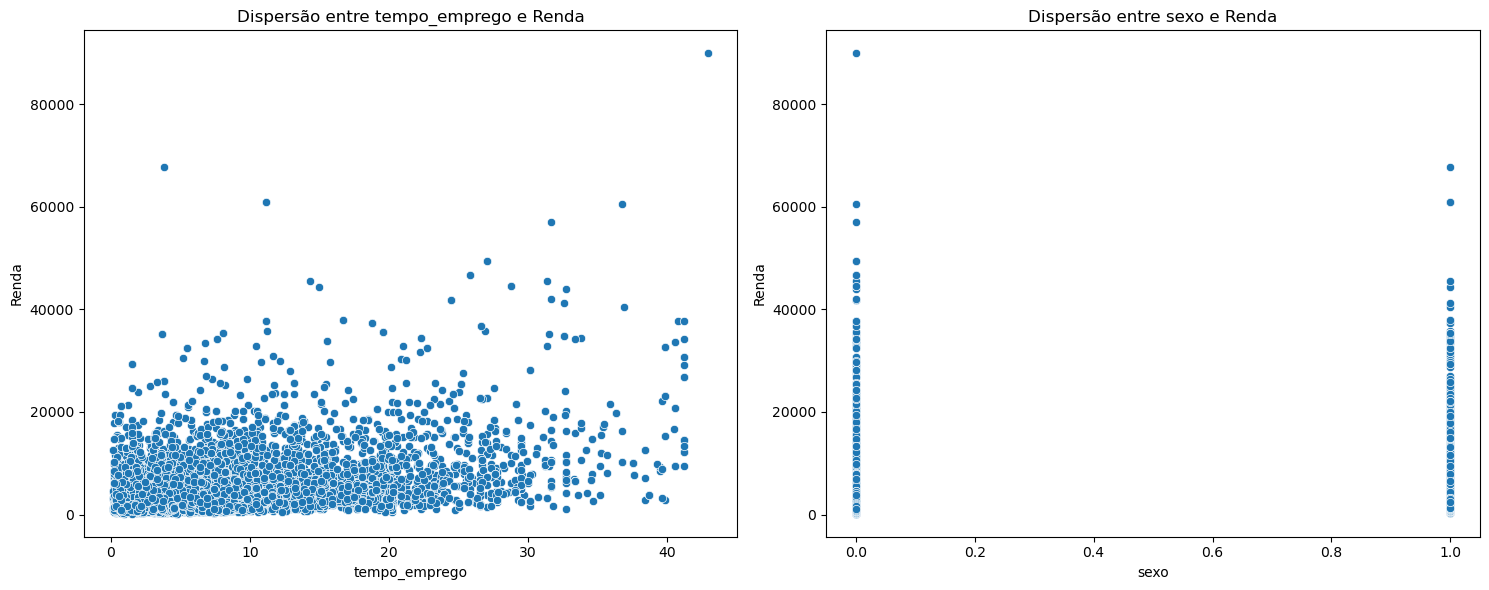

['tempo_emprego', 'sexo']

In [4]:
# Identificando as duas variáveis mais correlacionadas com 'renda', excluindo a própria 'renda'
correlacoes_renda = correlacao_expandida['renda'].drop('renda').sort_values(ascending=False)
variaveis_mais_correlacionadas = correlacoes_renda.head(2).index.tolist()

# Gerando gráficos de dispersão para as duas variáveis mais correlacionadas com 'renda'
plt.figure(figsize=(15, 6))

for i, var in enumerate(variaveis_mais_correlacionadas, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=previsao_de_renda[var], y=previsao_de_renda['renda'])
    plt.title(f'Dispersão entre {var} e Renda')
    plt.xlabel(var)
    plt.ylabel('Renda')

plt.tight_layout()
plt.show()

variaveis_mais_correlacionadas  # Retornando as variáveis mais correlacionadas para referência

**Disclaimer**

Apesar da variável sexo ter mostrado uma correlação com Renda, eu não a utilizaria por questões éticas para que as aplicações práticas não reforcem estereotipos ou resultem em discriminação

3) Na sua opinião, há outliers na variável renda?

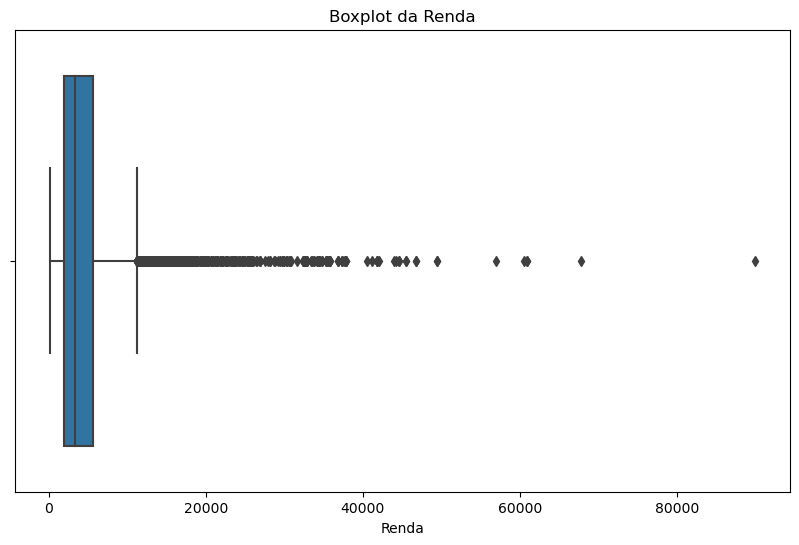

In [5]:
# Gerando um boxplot para a variável 'renda' em busca de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=previsao_de_renda['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

A distribuição dos dados sugere que a maioria das rendas se concentra em valores mais baixos, com uma quantidade relativamente pequena de valores excepcionalmente altos que se qualificam como outliers. Esses outliers podem ser devidos a uma variedade de fatores, incluindo, mas não se limitando a, diferenças substanciais na renda devido a profissões altamente remuneradas, status empresarial, ou outros fatores econômicos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

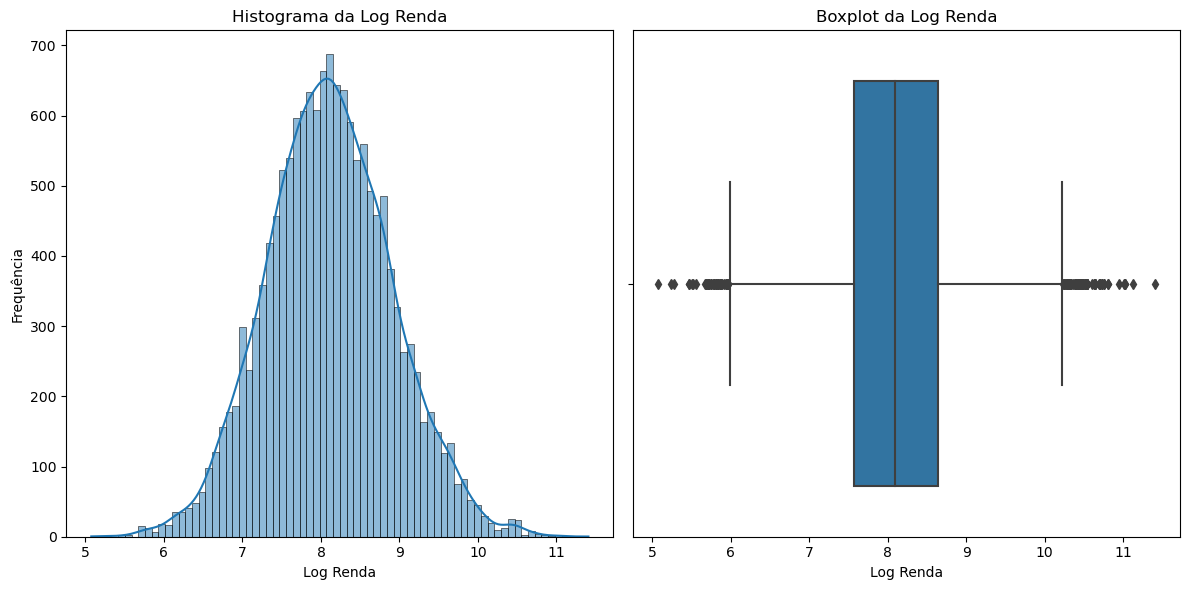

In [6]:
import numpy as np

# Aplicando a transformação logarítmica na variável 'renda' para criar uma nova coluna 'log_renda'
previsao_de_renda['log_renda'] = np.log(previsao_de_renda['renda'])

# Gerando um histograma para a variável 'log_renda'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(previsao_de_renda['log_renda'], kde=True)
plt.title('Histograma da Log Renda')
plt.xlabel('Log Renda')
plt.ylabel('Frequência')

# Gerando um boxplot para a variável 'log_renda'
plt.subplot(1, 2, 2)
sns.boxplot(x=previsao_de_renda['log_renda'])
plt.title('Boxplot da Log Renda')
plt.xlabel('Log Renda')

plt.tight_layout()
plt.show()


A transformação logarítmica da variável "renda" resultou em uma nova variável "log_renda", cuja distribuição foi visualizada através de um histograma e um boxplot.

Histograma da Log Renda: O histograma da "log_renda" mostra uma distribuição que parece mais simétrica e normalizada em comparação com a distribuição original da "renda". Isso indica que a transformação logarítmica ajudou a normalizar a distribuição, tornando-a mais próxima de uma distribuição normal, o que pode ser benéfico para certas análises estatísticas e modelagens preditivas.

Boxplot da Log Renda: O boxplot da "log_renda" sugere uma redução na presença e impacto de outliers em comparação com o boxplot original da "renda". Embora ainda existam alguns outliers, eles parecem menos extremos, o que é um efeito comum da transformação logarítmica, já que ela tende a reduzir a variabilidade dos dados, especialmente para valores maiores.

Essas observações indicam que a transformação logarítmica pode ser útil para tratar a assimetria e a presença de outliers na variável "renda", possivelmente melhorando a qualidade das análises subsequentes.

A seguir, podemos revisar a matriz de correlação incluindo a "log_renda" para ver como essa transformação afeta as relações entre "renda" e outras variáveis no conjunto de dados.

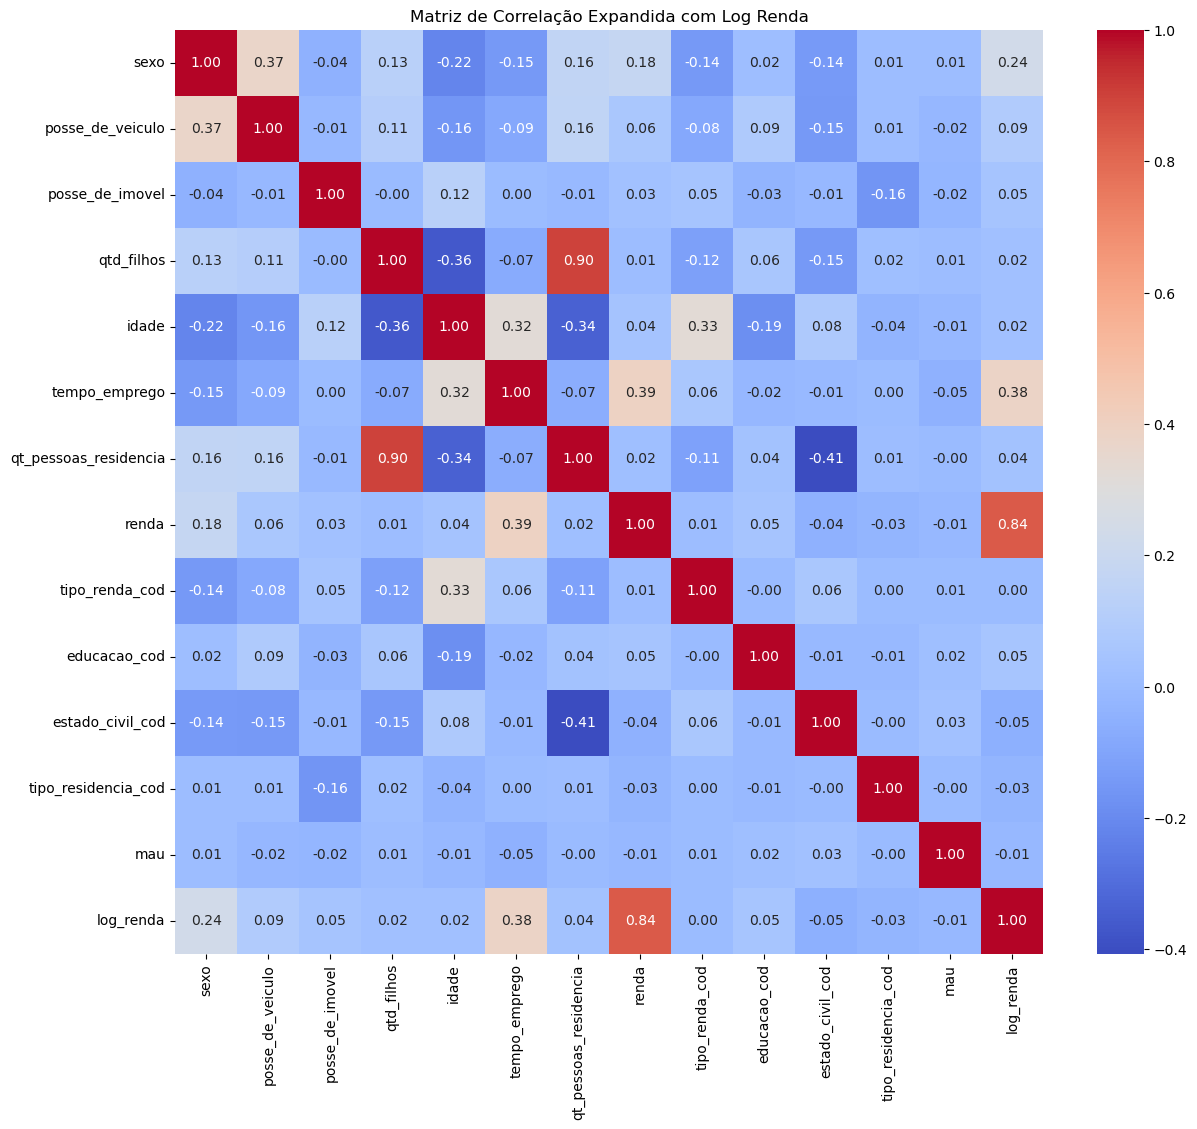

In [7]:
# Atualizando a matriz de correlação para incluir 'log_renda'
correlacao_expandida_com_log = previsao_de_renda[variaveis_analise + ['log_renda']].corr()

# Gerando o mapa de calor da matriz de correlação atualizada
plt.figure(figsize=(14, 12))
sns.heatmap(correlacao_expandida_com_log, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlação Expandida com Log Renda')
plt.show()

A matriz de correlação expandida agora inclui a "log_renda", permitindo-nos observar como a transformação logarítmica da renda impacta suas correlações com as outras variáveis no conjunto de dados.

Algumas observações da matriz de correlação atualizada:

**Correlações com Log Renda:** A inclusão da "log_renda" na matriz permite comparar diretamente suas correlações com outras variáveis em relação à "renda" original. Isso pode revelar se a transformação logarítmica alterou significativamente a força ou a direção de quaisquer correlações.

**Comparação com Renda Original:** Ao comparar as correlações da "log_renda" com as da "renda" original, podemos avaliar se a transformação logarítmica resultou em relações mais lineares ou em uma alteração na força das correlações. Isso pode ser particularmente útil para variáveis que tinham correlações fracas ou não lineares com a "renda" original.

**Insights para Modelagem:** A transformação logarítmica pode melhorar a performance de modelos preditivos ao normalizar a distribuição de variáveis dependentes e reduzir o impacto de outliers. As correlações na matriz atualizada podem fornecer insights valiosos sobre quais variáveis podem ser mais relevantes ao modelar a "log_renda" em vez da "renda" original.

Este tipo de análise é fundamental para entender melhor as dinâmicas dos dados e preparar o terreno para modelagens preditivas mais eficazes, especialmente em contextos financeiros onde a renda desempenha um papel crucial em muitas decisões

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do logaritmo na variável "renda" parece ter melhorado a análise em várias frentes:

**Normalização da Distribuição:** O histograma da "log_renda" mostrou uma distribuição mais simétrica e próxima de uma distribuição normal em comparação com a distribuição original da "renda". Em estatística, muitos testes e modelos preditivos, como regressão linear, assumem que as variáveis têm distribuições normais. Portanto, a transformação logarítmica ajudou a alinhar a distribuição da renda com essas premissas, potencialmente melhorando a validade de tais análises.

**Redução de Outliers:** O boxplot da "log_renda" indicou uma redução significativa no impacto dos outliers. Embora ainda existam alguns outliers, eles não são tão extremos quanto na distribuição original da renda. Isso é benéfico porque outliers podem distorcer análises e modelos, levando a conclusões enganosas. A redução de outliers pode, portanto, levar a uma interpretação mais precisa dos dados.

**Melhoria nas Correlações:** A matriz de correlação expandida com a "log_renda" permitiu observar as relações entre a renda transformada e outras variáveis. Embora a transformação logarítmica não altere necessariamente a direção das correlações, ela pode melhorar a linearidade e a interpretabilidade das relações, o que é particularmente útil para modelagem preditiva.

**Aplicabilidade a Modelos Preditivos:** A normalização da distribuição de renda e a redução do impacto de outliers podem melhorar a performance de modelos preditivos. Modelos como a regressão linear funcionam melhor com variáveis que têm relações lineares e distribuições que se aproximam da normalidade.

Portanto, considerando esses aspectos, a aplicação do logaritmo na variável "renda" parece ter melhorado a análise dos dados. 